In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
y = np.random.normal(0, 0.1, 500)

In [3]:
y.shape

(500,)

In [4]:
type(y)

numpy.ndarray

In [5]:
y = y.reshape(100, 5)

In [6]:
y.shape

(100, 5)

In [7]:
n = 0
col = []
for i in range(5):
    n+=1
    a = f"t{n}"
    col.append(a)

In [8]:
col

['t1', 't2', 't3', 't4', 't5']

In [9]:
def name_gen(name, num):
    n = 0
    col = []
    for i in range(num):
        n+=1
        a = f"{name}{n}"
        col.append(a)
    return col

In [10]:
col = name_gen('t', 5)

In [11]:
row = name_gen('g', 100)

In [12]:
y = pd.DataFrame(y)

In [13]:
y = y.set_axis(col, axis=1)

In [14]:
y = y.set_axis(row, axis=0)

In [15]:
y

t1        t2        t3        t4        t5
g1    0.070234  0.137482 -0.072714 -0.074097 -0.085524
g2    0.012267  0.201223  0.128372 -0.101952 -0.108819
g3   -0.005881  0.111813 -0.138937 -0.071990  0.130357
g4    0.104284 -0.127809 -0.085953  0.036131  0.029456
g5   -0.077072 -0.108866 -0.169738 -0.014347 -0.180063
...        ...       ...       ...       ...       ...
g96  -0.075427  0.008334 -0.008927  0.042956  0.056479
g97   0.097098 -0.062182  0.055066 -0.113409 -0.155251
g98  -0.007835 -0.050128  0.093732 -0.011433  0.034334
g99   0.151741  0.090705  0.020115  0.087049 -0.074078
g100  0.063929 -0.043116 -0.049221  0.164677  0.079056

[100 rows x 5 columns]

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

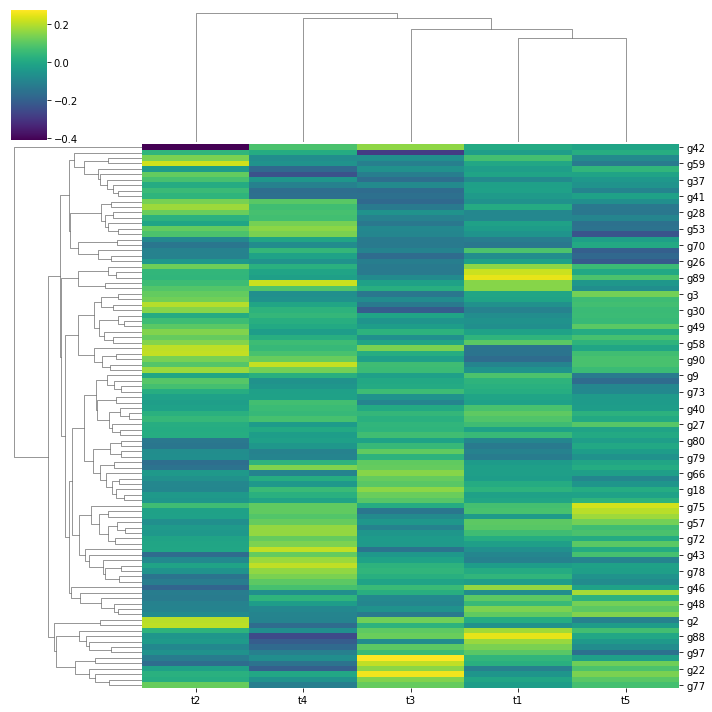

In [16]:
sns.clustermap(y, cmap='viridis')
plt.show()

## Stepwise Approach with Tree Cutting

In [17]:
# https://seaborn.pydata.org/generated/seaborn.clustermap.html
# https://www.python-graph-gallery.com/404-dendrogram-with-heat-map
# https://stackoverflow.com/questions/48173798/additional-row-colors-in-seaborn-cluster-map
# https://seaborn.pydata.org/generated/seaborn.hls_palette.html
# https://www.python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves

C:\Users\m477a\AppData\Local\Temp/ipykernel_29604/1019445950.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  matrix = pd.DataFrame(np.random.random_integers(0,1, size=(50,4)))
C:\Users\m477a\AppData\Local\Temp/ipykernel_29604/1019445950.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
  labels = np.random.random_integers(0,5, size=50)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

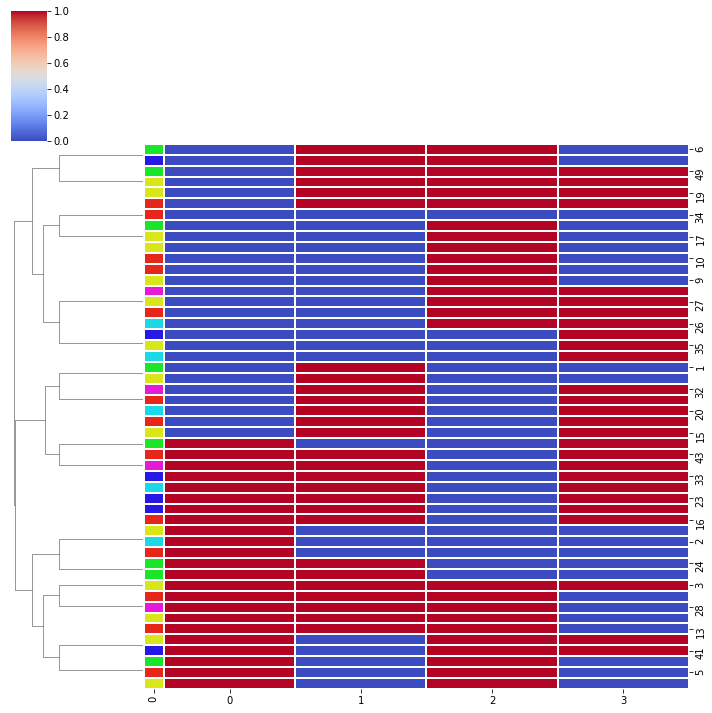

In [18]:
matrix = pd.DataFrame(np.random.random_integers(0,1, size=(50,4)))
labels = np.random.random_integers(0,5, size=50)

lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
row_colors = pd.DataFrame(labels)[0].map(lut)

g=sns.clustermap(matrix, col_cluster=False, linewidths=0.1, cmap='coolwarm', row_colors=row_colors)
plt.show()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

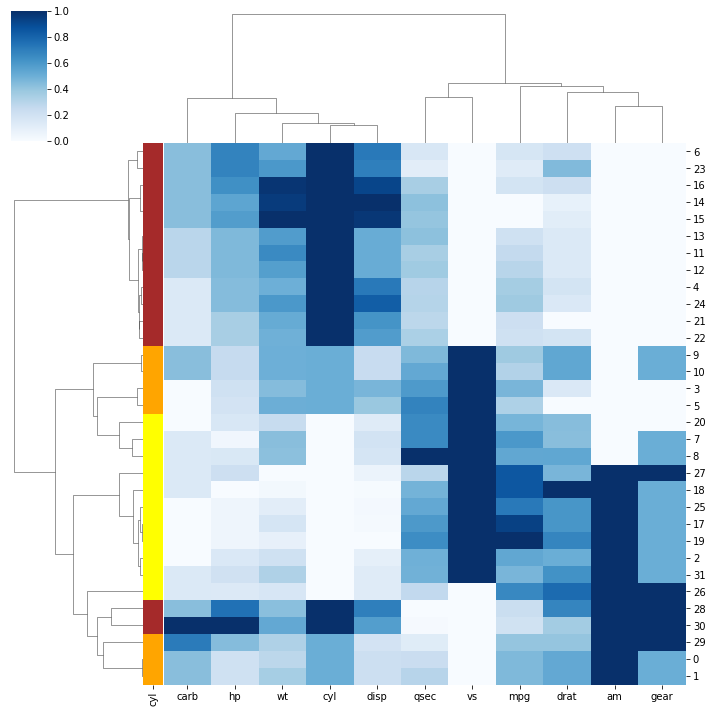

In [19]:
# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
df = pd.read_csv('mtcars.csv')

# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)
 
# plot
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)
plt.show()

In [20]:
my_palette

{6: 'orange', 4: 'yellow', 8: 'brown'}

## K-means Clustering

In [21]:
from sklearn.cluster import KMeans

In [22]:
mu_tr = y.mean(axis=0)
std_tr = y.std(axis=0)

In [23]:
y_scale = np.array(((y - mu_tr)/std_tr))

In [24]:
y_scale = y_scale.T

In [25]:
y_scale.shape

(5, 100)

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(y_scale.T)

In [27]:
kmeans.labels_

array([1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0,
       0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0,
       2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2])

In [28]:
km = pd.DataFrame()

In [29]:
km[0] = row

In [30]:
km[1] = kmeans.labels_

In [31]:
km.T

0   1   2   3   4   5   6   7   8    9   ...   90   91   92   93   94   95  \
0  g1  g2  g3  g4  g5  g6  g7  g8  g9  g10  ...  g91  g92  g93  g94  g95  g96   
1   1   0   1   2   1   1   1   2   1    1  ...    0    1    0    0    1    1   

    96   97   98    99  
0  g97  g98  g99  g100  
1    0    0    2     2  

[2 rows x 100 columns]

## Fuzzy C-Means Clustering

In [32]:
# conda install -c conda-forge scikit-fuzzy
# pip install -U scikit-fuzzy
import skfuzzy as fuzz

In [33]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    y, # the data
    4, # desired number of cluster 
    2, # Array exponentiation applied to the membership function u_old at each iteration, where U_new = u_old ** m.
    error=0.005, # stopping criterion, stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter=1000, # maximum number of itteration
    # maxiter=1000,
    init=None) # Initial fuzzy c-partitioned matrix.
   

In [34]:
# cluster center
# cntr

In [35]:
# Final fuzzy c-partitioned matrix.
# u

In [36]:
# Initial guess at fuzzy c-partitioned matrix
# u0

In [37]:
# Final Euclidian distance matrix.
# d

In [38]:
# Objective function history.
# jm

In [39]:
# Number of iterations run.
# p

In [40]:
# Final fuzzy partition coefficient.
# fpc

In [41]:
cntr.T.shape

(100, 4)

In [42]:
cnt_df = pd.DataFrame(cntr.T).set_axis(row, axis=0)

In [43]:
cnt_df = round(cnt_df, 2)

In [44]:
cnt_df

0     1     2     3
g1    0.13 -0.08 -0.07  0.06
g2    0.19 -0.11  0.12  0.00
g3    0.10  0.11 -0.14 -0.01
g4   -0.12  0.03 -0.08  0.10
g5   -0.10 -0.17 -0.16 -0.07
...    ...   ...   ...   ...
g96   0.01  0.06 -0.01 -0.07
g97  -0.06 -0.15  0.05  0.08
g98  -0.05  0.03  0.09 -0.01
g99   0.09 -0.06  0.02  0.15
g100 -0.03  0.09 -0.04  0.07

[100 rows x 4 columns]

In [45]:
cluster_membership = np.argmax(cntr, axis=0) 

In [46]:
cluster_membership.shape

(100,)

In [47]:
fanny = pd.DataFrame()

In [48]:
fanny[0] = row

In [49]:
fanny[1] = cluster_membership 

In [50]:
fanny.T

0   1   2   3   4   5   6   7   8    9   ...   90   91   92   93   94   95  \
0  g1  g2  g3  g4  g5  g6  g7  g8  g9  g10  ...  g91  g92  g93  g94  g95  g96   
1   0   0   1   3   3   0   0   3   3    0  ...    2    0    1    1    3    1   

    96   97   98    99  
0  g97  g98  g99  g100  
1    3    2    3     1  

[2 rows x 100 columns]

In [51]:
fannyyMA = cnt_df > 0.20 # where this 0.20 came from?????

In [52]:
# fannyyMA

referece [here](https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#cmeans)

## Principal Component Analysis Clustring

In [53]:
# scale the data first
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler().fit(y)

In [55]:
scaler = scaler.transform(y)

In [56]:
dtsc = scaler

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA()

In [59]:
pca.fit(dtsc)

PCA()

In [60]:
pct = pca.fit_transform(dtsc)
# to getting the principal component or PCs

In [61]:
pc1 = pct[:, 0]
pc2 = pct[:, 1]

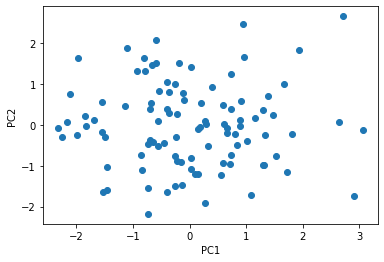

In [62]:
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [63]:
pc_result = pd.DataFrame()

In [64]:
pc_result[0] = row

In [65]:
pc_result[1] = pc1

In [66]:
pc_result[2] = pc2

In [67]:
pc_result.T

0         1         2         3         4         5         6   \
0        g1        g2        g3        g4        g5        g6        g7   
1 -0.802718 -0.182895 -0.694182  0.667037 -1.140896 -2.322652 -0.670853   
2  1.645822  1.506345  0.401696  -0.06897  0.452759 -0.087364  1.464827   

         7         8         9   ...        90        91        92        93  \
0        g8        g9       g10  ...       g91       g92       g93       g94   
1  0.029146 -0.122479 -0.400657  ...   0.73995 -0.858722  0.398669  1.304011   
2  1.414168  0.778228  1.049614  ... -0.746167 -0.742523  0.937279 -0.987351   

         94        95        96        97        98        99  
0       g95       g96       g97       g98       g99      g100  
1  -0.70379 -0.219405  0.954464  1.018647 -0.100854  0.098992  
2 -0.364725 -0.880809  1.653456 -0.383443   0.61305 -1.213755  

[3 rows x 100 columns]

In [68]:
pc_result.head()

0         1         2
0  g1 -0.802718  1.645822
1  g2 -0.182895  1.506345
2  g3 -0.694182  0.401696
3  g4  0.667037 -0.068970
4  g5 -1.140896  0.452759

In [69]:
pc_result[2][1]

1.5063454525982125

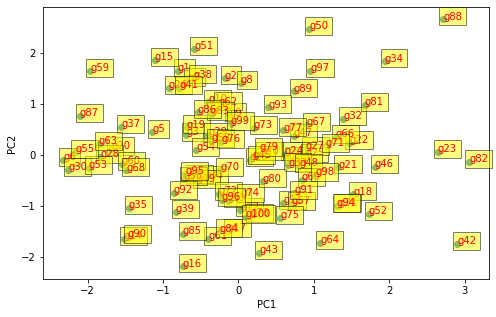

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(pc_result[1], pc_result[2])

for i in range(pc_result.shape[0]):
    plt.text(x=pc_result[1][i],# +0.3
             y=pc_result[2][i],# +0.3
             s=pc_result[0][i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

reference [here](https://github.com/hashABCD/Publications/blob/main/Medium/How%20to%20Add%20Text%20Labels%20to%20Scatterplot.ipynb)
[here](https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a)

## Multidimensional Scaling (MDS)

In [71]:
loc = pd.read_csv("loc.csv")

In [72]:
index_name = ['Athens','Barcelona', 'Brussels', 'Clais', 'Cherbourg',
              'Clogne', 'Copenhagen', 'Geneva', 'Gibraltar', 'Hamburg',
              'Hook of Holland', 'Lisbon', 'Lyons', 'Madrid', 'Marseilles',
              'Milan', 'Munich', 'Paris', 'Rome', 'Stockholm', 'Vienna']

In [73]:
loc['city'] = index_name

In [74]:
loc.head()

V1           V2       city
0  2290.274680  1798.802928     Athens
1  -825.382790   546.811480  Barcelona
2    59.183341  -367.081352   Brussels
3   -82.845973  -429.914658      Clais
4  -352.499435  -290.908433  Cherbourg

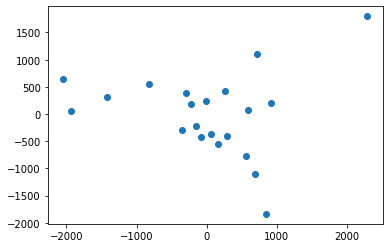

In [75]:
plt.scatter(loc.V1, loc.V2)
plt.show()

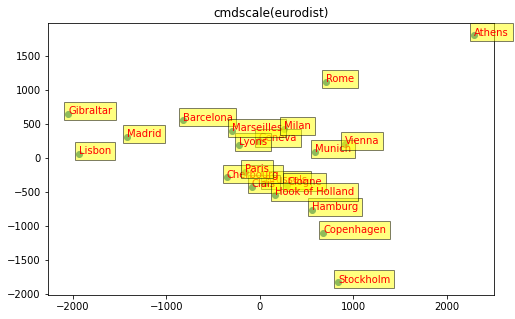

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(loc.V1, loc.V2)

for i in range(loc.shape[0]):
    plt.text(x=loc.V1[i],# +0.3
             y=loc.V2[i],# +0.3
             s=loc.city[i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))
plt.title('cmdscale(eurodist)')
plt.show()

## Biclustering

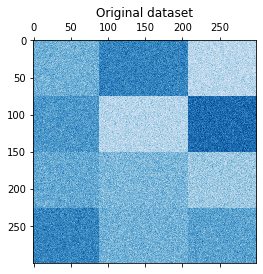

In [77]:
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score


n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

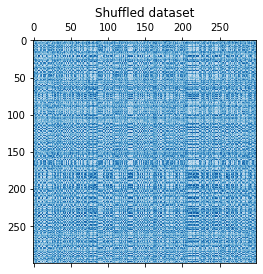

In [78]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

consensus score: 1.0


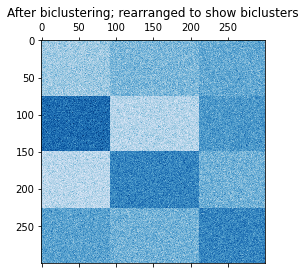

In [79]:
model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

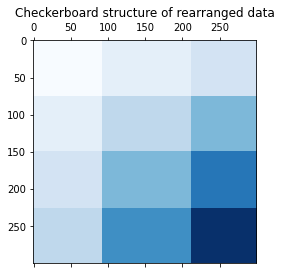

In [80]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()

reference [here](https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_biclustering.html)

### Calculate jaccard similarity in Python

In [81]:
A = {1, 2, 3, 5, 7}
B = {1, 2, 4, 8, 9}

In [82]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = A.intersection(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity

In [83]:
similarity = jaccard_similarity(A, B)

print(similarity)

0.25


### Calculate Jaccard distance in Python

reference [here](https://skeptric.com/jaccard-containment/)

In [84]:
A = {1, 2, 3, 5, 7}
B = {1, 2, 4, 8, 9}

In [85]:
def jaccard_distance(A, B):
    #Find symmetric difference of two sets
    nominator = A.symmetric_difference(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    distance = len(nominator)/len(denominator)
    
    return distance

distance = jaccard_distance(A, B)

In [86]:
distance = jaccard_distance(A, B)

print(distance)

0.75


### Calculate similarity and distance of asymmetric binary attributes in Python

In [87]:
import numpy as np
from scipy.spatial.distance import jaccard
from sklearn.metrics import jaccard_score

In [88]:
A = np.array([1,0,0,1,1,1])
B = np.array([0,0,1,1,1,0])

In [89]:
similarity = jaccard_score(A, B)
distance = jaccard(A, B)

print(f'Jaccard similarity is equal to: {similarity}')
print(f'Jaccard distance is equal to: {distance}')

Jaccard similarity is equal to: 0.4
Jaccard distance is equal to: 0.6


reference [here](https://python-bloggers.com/2021/12/jaccard-similarity-and-jaccard-distance-in-python/)

## Clustering Excercise

In [90]:
import random

In [91]:
random.seed(1410)
y = np.random.normal(0, 0.1, 50)
y = y.reshape(10, 5)

In [92]:
y.shape

(10, 5)

In [93]:
y

array([[-3.20522519e-02, -1.10976564e-01, -6.06139671e-02,
         6.23897716e-02, -5.00303860e-03],
       [ 4.83630451e-03,  1.80843201e-02,  3.69599282e-02,
         6.48268289e-02,  4.82361738e-02],
       [ 1.82956222e-01,  1.34713194e-01,  4.04727092e-02,
        -2.06912274e-01,  1.16741839e-01],
       [-5.08399613e-02,  1.62945085e-01, -1.31915444e-01,
        -1.02526301e-01,  5.19625494e-02],
       [ 1.85117839e-01,  1.15447971e-02,  5.52397489e-02,
        -9.60433344e-02,  3.34921467e-02],
       [-4.09780792e-02, -4.25048361e-02,  1.36729457e-01,
         1.34756632e-01, -7.14266215e-02],
       [-1.47403360e-01, -1.23658452e-01,  2.36976517e-01,
         6.53027024e-02, -1.18263136e-01],
       [ 1.42698000e-01, -8.86098184e-02, -4.01780161e-02,
         2.56627308e-02, -6.28606801e-02],
       [ 6.07692001e-03, -8.48207086e-03, -2.57641967e-02,
         5.32313245e-02, -2.15812458e-05],
       [ 1.16520198e-01, -3.79119242e-02, -1.36700255e-01,
         1.84543756e-01

In [94]:
scaler = StandardScaler().fit(y.T)

In [95]:
scaler = scaler.transform(y.T)

In [96]:
scaler = scaler.T

In [97]:
scaler.shape

(10, 5)

In [98]:
scaler

array([[-0.04853021, -1.41595467, -0.54338391,  1.58775055,  0.42011823],
       [-1.39825418, -0.77564595,  0.11143852,  1.42108083,  0.64138078],
       [ 0.93682346,  0.58745316, -0.09502528, -1.88655807,  0.45730673],
       [-0.33914475,  1.63294245, -1.08703579, -0.81593192,  0.60917001],
       [ 1.63349313, -0.29204163,  0.19268887, -1.48557194, -0.04856843],
       [-0.69553   , -0.71204656,  1.2269215 ,  1.20557935, -1.02492428],
       [-0.87677058, -0.71661856,  1.71575225,  0.55786571, -0.68022882],
       [ 1.77833231, -1.01316179, -0.42867186,  0.36591458, -0.70241324],
       [ 0.04050943, -0.51128123, -1.16627962,  1.82767725, -0.19062582],
       [ 0.87377533, -0.41915852, -1.24623241,  1.44328094, -0.65166534]])

In [99]:
scaler[0]

array([-0.04853021, -1.41595467, -0.54338391,  1.58775055,  0.42011823])

In [100]:
import statistics as stat

In [101]:
stat.stdev(scaler[0])

1.1180339887498947

In [102]:
# numpy standard scaler
np.std(scaler[0])

1.0

In [103]:
data=[]
for n in range(scaler.shape[0]):
    data.append(np.std(scaler[n]))
#     data.append(stat.stdev(scaler[n]))

In [104]:
data

[1.0,
 0.9999999999999998,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 1.0]

In [105]:
row = ['g1', 'g2', 'g3', 'g4', 'g5', 
       'g6', 'g7', 'g8', 'g9', 'g10']

In [106]:
data_y = pd.DataFrame()

In [107]:
data_y[0] = row
data_y[1] = data

In [108]:
data_y.T

0    1    2    3    4    5    6    7    8    9
0   g1   g2   g3   g4   g5   g6   g7   g8   g9  g10
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

### Euclidean distance matrix

In [109]:
y = pd.DataFrame(y)

In [110]:
y

0         1         2         3         4
0 -0.032052 -0.110977 -0.060614  0.062390 -0.005003
1  0.004836  0.018084  0.036960  0.064827  0.048236
2  0.182956  0.134713  0.040473 -0.206912  0.116742
3 -0.050840  0.162945 -0.131915 -0.102526  0.051963
4  0.185118  0.011545  0.055240 -0.096043  0.033492
5 -0.040978 -0.042505  0.136729  0.134757 -0.071427
6 -0.147403 -0.123658  0.236977  0.065303 -0.118263
7  0.142698 -0.088610 -0.040178  0.025663 -0.062861
8  0.006077 -0.008482 -0.025764  0.053231 -0.000022
9  0.116520 -0.037912 -0.136700  0.184544 -0.065683

In [111]:
from sklearn.metrics.pairwise import euclidean_distances

In [112]:
y.iloc[1:5,:3]

0         1         2
1  0.004836  0.018084  0.036960
2  0.182956  0.134713  0.040473
3 -0.050840  0.162945 -0.131915
4  0.185118  0.011545  0.055240

In [113]:
euclidean_distances(y.iloc[1:4,:3], y.iloc[1:4,:3])

array([[0.00000000e+00, 2.12935058e-01, 2.29354266e-01],
       [2.12935058e-01, 3.72529030e-09, 2.91848198e-01],
       [2.29354266e-01, 2.91848198e-01, 0.00000000e+00]])

### Correlation-based distance matrix

In [114]:
c = y.corr('pearson').T

In [115]:
c

0         1         2         3         4
0  1.000000  0.287020 -0.337445 -0.401049  0.432604
1  0.287020  1.000000 -0.330099 -0.713413  0.820542
2 -0.337445 -0.330099  1.000000  0.021461 -0.314214
3 -0.401049 -0.713413  0.021461  1.000000 -0.774211
4  0.432604  0.820542 -0.314214 -0.774211  1.000000

In [116]:
c = c-1

In [117]:
d = c.iloc[1:5,1:5]

In [118]:
d

1         2         3         4
1  0.000000 -1.330099 -1.713413 -0.179458
2 -1.330099  0.000000 -0.978539 -1.314214
3 -1.713413 -0.978539  0.000000 -1.774211
4 -0.179458 -1.314214 -1.774211  0.000000

### Hierarchical Clustering

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

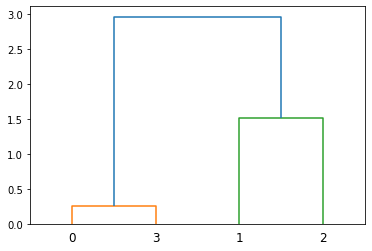

In [120]:
linkage_data = linkage(d, method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [121]:
yidx = y.set_axis(row, axis=0)

In [122]:
yidx

0         1         2         3         4
g1  -0.032052 -0.110977 -0.060614  0.062390 -0.005003
g2   0.004836  0.018084  0.036960  0.064827  0.048236
g3   0.182956  0.134713  0.040473 -0.206912  0.116742
g4  -0.050840  0.162945 -0.131915 -0.102526  0.051963
g5   0.185118  0.011545  0.055240 -0.096043  0.033492
g6  -0.040978 -0.042505  0.136729  0.134757 -0.071427
g7  -0.147403 -0.123658  0.236977  0.065303 -0.118263
g8   0.142698 -0.088610 -0.040178  0.025663 -0.062861
g9   0.006077 -0.008482 -0.025764  0.053231 -0.000022
g10  0.116520 -0.037912 -0.136700  0.184544 -0.065683

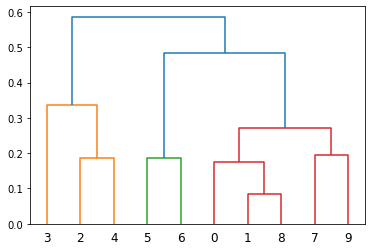

In [123]:
linkage_data = linkage(yidx, method='complete', metric='euclidean')
dendrogram(linkage_data)

plt.show()

### Heatmaps

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

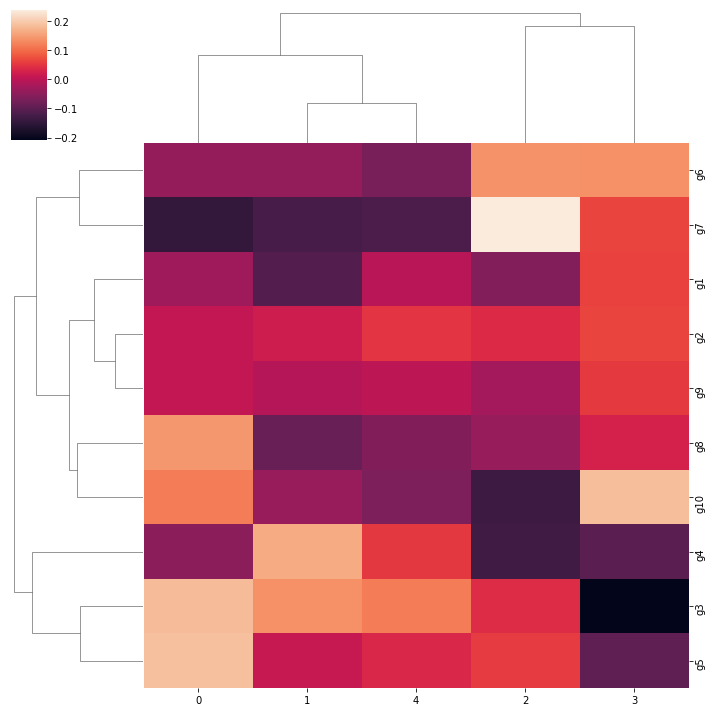

In [124]:
sns.clustermap(yidx)
plt.show()

### K-Means Fuzzy Clustering

In [125]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    y, # the data
    4, # desired number of cluster 
    2, # Array exponentiation applied to the membership function u_old at each iteration, where U_new = u_old ** m.
    error=0.005, # stopping criterion, stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter=1000, # maximum number of itteration
    # maxiter=1000,
    init=None) # Initial fuzzy c-partitioned matrix.
   

In [126]:
cnt_df = pd.DataFrame(cntr.T)

In [127]:
cnt_df = round(cnt_df, 2)

In [128]:
cnt_df.iloc[:4,:]

0     1     2     3
0  0.06 -0.03 -0.06 -0.06
1  0.06  0.00  0.03  0.04
2 -0.21  0.18  0.13  0.04
3 -0.10 -0.05  0.11 -0.13

In [129]:
cluster_membership = np.argmax(cntr, axis=0) 

In [130]:
cluster_membership
# the cluster is from 0~3
# so there 4 class in the 
# cluster

array([0, 0, 1, 2, 1, 3, 3, 1, 0, 0], dtype=int64)

In [131]:
fanny = pd.DataFrame()
fanny[0] = row
fanny[1] = cluster_membership

In [132]:
fanny.T

0   1   2   3   4   5   6   7   8    9
0  g1  g2  g3  g4  g5  g6  g7  g8  g9  g10
1   0   0   1   2   1   3   3   1   0    0

### Multidimensional Scaling (MDS)

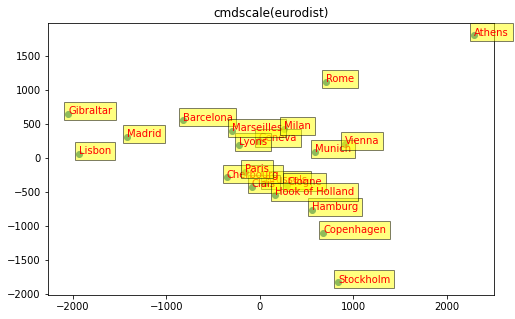

In [133]:
plt.figure(figsize=(8,5))
plt.scatter(loc.V1, loc.V2)

for i in range(loc.shape[0]):
    plt.text(x=loc.V1[i],# +0.3
             y=loc.V2[i],# +0.3
             s=loc.city[i], 
             fontdict=dict(color='red',size=10),
             bbox=dict(facecolor='yellow',alpha=0.5))
plt.title('cmdscale(eurodist)')
plt.show()

### Principal Component Analysis (PCA)

In [134]:
scaler = StandardScaler().fit(y)

In [135]:
scaler = scaler.transform(y)

In [136]:
dtsc = scaler

In [137]:
pca = PCA()

In [138]:
pct = pca.fit_transform(dtsc)

In [143]:
pct.shape

(10, 5)

In [139]:
from mpl_toolkits import mplot3d

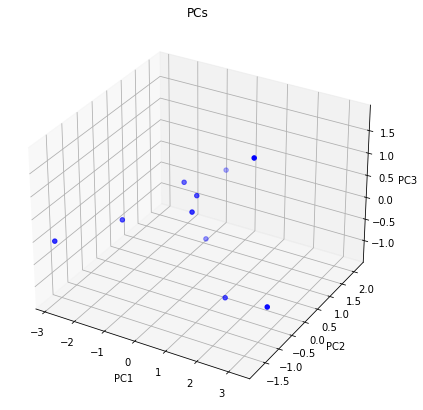

In [140]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(pct[:, 0], pct[:, 1], pct[:, 2], color = "blue")

plt.title("PCs")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# show plot
plt.show()

In [144]:
pcr = pd.DataFrame()

In [145]:
pcr['pc1'] = pct[:, 0]
pcr['pc2'] = pct[:, 1]
pcr['pc3'] = pct[:, 2]

In [146]:
pcr

pc1       pc2       pc3
0 -0.820891  0.586948  0.424147
1  0.230221 -0.277188  0.416920
2  3.211989 -0.927443 -0.706682
3  2.017580 -0.072550  1.830734
4  1.330816 -0.295550 -1.282595
5 -1.756084 -0.621162  0.032345
6 -2.863216 -1.781687 -0.034561
7 -0.469599  1.006636 -1.034578
8 -0.111305  0.270108  0.425277
9 -0.769510  2.111887 -0.071006

In [ ]:
# pip install plotly

In [150]:
# using plotly the user interaction 
# are more active than the other python library
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(pcr, x='pc1', y='pc2', z='pc3')
fig.show()

In [148]:
# pip install plotly

     ---------------------------------------- 15.3/15.3 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\m477a\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


3d plotting reference [here](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) [here](https://plotly.com/python/3d-scatter-plots/)

overall reference [here](https://girke.bioinformatics.ucr.edu/GEN242/tutorials/rclustering/rclustering/#euclidean-distance-matrix)